# Read and split RGB jepg image

In [1]:
import numpy as np
import PIL
from PIL import Image
from astropy.io import fits

In [2]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [4]:
image = Image.open('ngc602_ChandraHubbleSpitzer_960.jpg')

Image size: 960 x 960


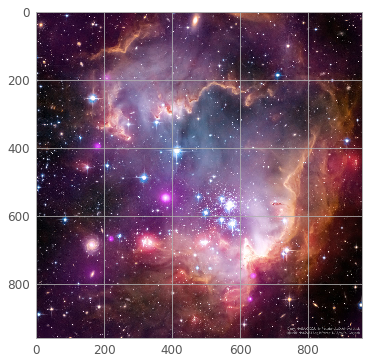

In [146]:
xsize, ysize = image.size
print("Image size: {} x {}".format(xsize, ysize))
plt.imshow(image)

In [147]:
r, g, b = image.split()

r_data = np.array(r.getdata()) # data is now an array of length ysize*xsize
g_data = np.array(g.getdata())
b_data = np.array(b.getdata())

In [148]:
r_data = r_data.reshape(ysize, xsize)
g_data = g_data.reshape(ysize, xsize)
b_data = b_data.reshape(ysize, xsize)

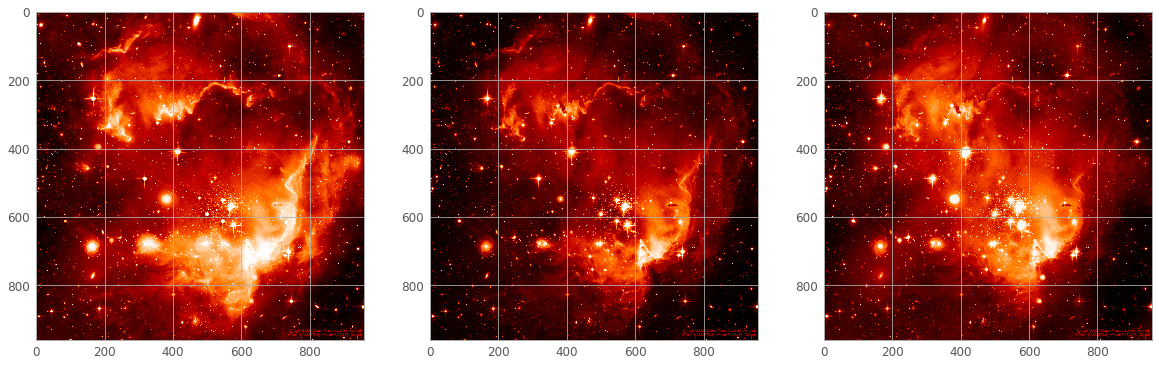

In [149]:
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(131)
ax1.imshow(r_data)

ax2 = plt.subplot(132)
ax2.imshow(g_data)

ax3 = plt.subplot(133)
ax3.imshow(b_data)

plt.show()

# Determine and plot atlaz coordinates of a celestial object

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()

In [151]:
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [152]:
m33 = SkyCoord.from_name('M33')

In [153]:
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)
utcoffset = -2*u.hour  # Eastern Daylight Time
time = Time('2020-2-28 12:00:00') - utcoffset

In [154]:
m33altaz = m33.transform_to(AltAz(obstime=time,location=bear_mountain))
print("M33's Altitude = {0.alt:.2}".format(m33altaz))

M33's Altitude = 2e+01 deg


In [155]:
midnight = Time('2020-2-28 00:00:00') - utcoffset
delta_midnight = np.linspace(-2, 10, 100)*u.hour
frame_Feb28night = AltAz(obstime=midnight+delta_midnight,
                          location=bear_mountain)
m33altazs_Feb28night = m33.transform_to(frame_Feb28night)

In [156]:
m33airmasss_Feb28night = m33altazs_Feb28night.secz

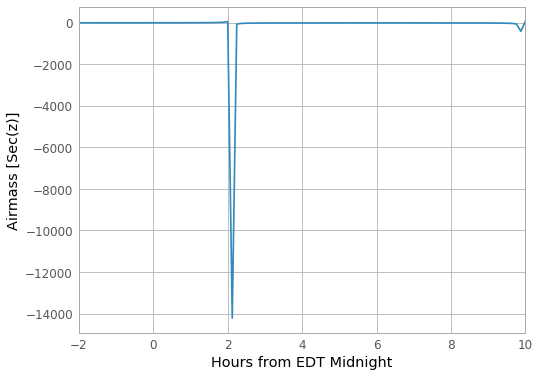

In [157]:
plt.plot(delta_midnight, m33airmasss_Feb28night)
plt.xlim(-2, 10)
# plt.ylim(1, 4) 
plt.xlabel('Hours from EDT Midnight')
plt.ylabel('Airmass [Sec(z)]')
plt.show()

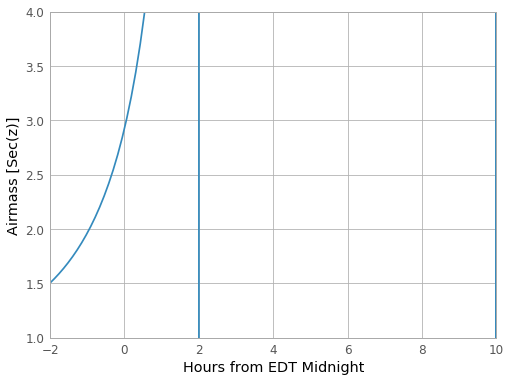

In [158]:
plt.plot(delta_midnight, m33airmasss_Feb28night)
plt.xlim(-2, 10)
plt.ylim(1, 4)
plt.xlabel('Hours from EDT Midnight')
plt.ylabel('Airmass [Sec(z)]')
plt.show()

In [159]:
from astropy.coordinates import get_sun
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times_Feb28_to_29 = midnight + delta_midnight
frame_Feb28_to_29 = AltAz(obstime=times_Feb28_to_29, location=bear_mountain)
sunaltazs_Feb28_to_29 = get_sun(times_Feb28_to_29).transform_to(frame_Feb28_to_29)

In [160]:
from astropy.coordinates import get_moon
moon_Feb28_to_29 = get_moon(times_Feb28_to_29)
moonaltazs_Feb28_to_29 = moon_Feb28_to_29.transform_to(frame_Feb28_to_29)

In [161]:
m33altazs_Feb28_to_29 = m33.transform_to(frame_Feb28_to_29)

In [163]:
# plt.plot(delta_midnight, sunaltazs_Feb28_to_29.alt, color='r', label='Sun')
# plt.plot(delta_midnight, m33altazs_Feb28_to_29.alt, color=[0.75]*3, ls='--', label='Moon')
# plt.scatter(delta_midnight, m33altazs_Feb28_to_29.alt,
#             c=m33altazs_Feb28_to_29.az, label='M33', lw=0, s=8,
#             cmap='viridis')
# plt.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
#                  sunaltazs_Feb28_to_29.alt < -0*u.deg, color='0.5', zorder=0)
# plt.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
#                  sunaltazs_Feb28_to_29.alt < -18*u.deg, color='k', zorder=0)
# plt.colorbar().set_label('Azimuth [deg]')
# plt.legend(loc='upper left')
# plt.xlim(-12*u.hour, 12*u.hour)
# plt.xticks((np.arange(13)*2-12)*u.hour)
# plt.ylim(0*u.deg, 90*u.deg)
# plt.xlabel('Hours from EDT Midnight')
# plt.ylabel('Altitude [deg]')
# plt.show()

In [5]:
from astropy.convolution import Gaussian2DKernel

In [10]:
kernel = Gaussian2DKernel(x_stddev=1, mode='center')

TypeError: __init__() takes exactly 2 arguments (1 given)

In [9]:
kernel = Gaussian2DKernel?